In [1]:
# !pip install patchify

In [2]:
# !pip install segmentation-models      ## after intalling this package go the file location

#     keras.utils.generic_utils.get_custom_objects().update(custom_objects)  ==> from this line remove  ....generic_utils....

In [3]:
# !pip install tensorflow

In [4]:
# !pip install scikit-learn

In [5]:
import os
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU

from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

Segmentation Models: using `keras` framework.


In [6]:
root_dir = "C:\\Users\\jites\Downloads\\Semantic segmentation dataset\\"

patch_size = 256

In [8]:
image_dataset = []

for path,subdir,files in os.walk(root_dir):
    # print(path)
    dirname = path.split(os.path.sep)[-1]         ## path.split('/')
    if dirname == 'images':
        images = os.listdir(path)                ## list of all images in this directory
        
        for i, image_name in enumerate(images):
            if image_name.endswith('.jpg'):
                image = cv2.imread(path+"/"+image_name, 1)            ## BGR
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                SIZE_X = (image.shape[1]//patch_size)*patch_size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size

                image = Image.fromarray(image)     
                
                image = image.crop((0,0, SIZE_X,SIZE_Y))       
                
                image = np.array(image)
                
                patches_img = patchify(image, (patch_size, patch_size, 3), step= patch_size)          ## step use for not overlaping of img
                ## print(patches_img.shape)                   ## It gives the shape like this....   (4, 4, 1, 256, 256, 3)
                                                            ## 4,4 => 4 img in vertical and 4 in horizontal (total 4*4 = 16)
                                                            ## 1 => depth of img       (256,256,3) => img size
                                
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        single_patch_img = patches_img[i,j,:,:]       ## go through every image... in vertical & horizontal way
                                                                    ## this is for one image after another...   i= row, j= column
                                                                    ## shape ==> (1, 256, 256, 3)
                                
                        ## use min_max_scaler for image normalization process
                        single_patch_img = scaler.fit_transform(
                            single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
#                         print(single_patch_img.shape)                                 ## shape ==> (1, 256, 256, 3)
                        
                        single_patch_img = single_patch_img[0]
                        image_dataset.append(single_patch_img)
print(len(image_dataset),"This much of images are present")

1305 This much of images are present


In [9]:
len(image_dataset)              ## image dataset store all images.... one after another

1305

In [10]:
print(image_dataset[-9].shape)

(256, 256, 3)


In [11]:
mask_dataset = []
for path,subdir,files in os.walk(root_dir):
#     print(path)
    dirname = path.split(os.path.sep)[-1]         ##path.split('/')
    if dirname == 'masks':
        masks = os.listdir(path)                          ## list of all images in this directory
        for i, mask_name in enumerate(masks):
            if mask_name.endswith('.png'):
                mask = cv2.imread(path+"/"+mask_name, 1) 
                
                mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size

                mask = Image.fromarray(mask)
                mask = mask.crop((0,0,SIZE_X,SIZE_Y))              
                mask = np.array(mask)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step= patch_size)   ## step use for not overlaping of img
                ## print(patches_mask.shape)

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        single_patch_mask = patches_mask[i,j,:,:]        
                        # print(single_patch_mask.shape)
                        single_patch_mask = single_patch_mask[0]
                        # print(single_patch_mask.shape)
                        mask_dataset.append(single_patch_mask)
print(len(mask_dataset),"This much of masks are present")

1305 This much of masks are present


In [12]:
print(type(image_dataset))
print(type(mask_dataset))

<class 'list'>
<class 'list'>


In [13]:
    ## convert list to array
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

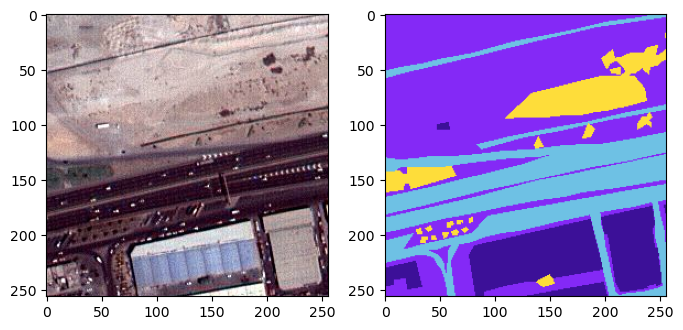

In [16]:
import random
import numpy as np

image_number = random.randint(0, len(image_dataset))

plt.figure(figsize = (8,5))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size,3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size,3)))
plt.show()

In [17]:
# Building: #3C1098
# Land (unpaved area): #8429F6
# Road: #6EC1E4
# Vegetation: #FEDD3A
# Water: #E2A929
# Unlabeled: #9B9B9B

In [19]:
Building = '#3C1098'.lstrip('#')
Building = np.array(tuple(int(Building[i:i+2], 16) for i in (0,2,4)))   # 60, 16, 152

Land = '#8429F6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2], 16) for i in (0, 2, 4)))     #132, 41, 246

Road = '#6EC1E4'.lstrip('#')
Road = np.array(tuple(int(Road[i:i+2], 16) for i in (0, 2, 4)))    #110, 193, 228

Vegetation =  'FEDD3A'.lstrip('#')
Vegetation = np.array(tuple(int(Vegetation[i:i+2], 16) for i in (0, 2, 4)))     #254, 221, 58

Water = 'E2A929'.lstrip('#')
Water = np.array(tuple(int(Water[i:i+2], 16) for i in (0, 2, 4)))     #226, 169, 41

Unlabeled = '#9B9B9B'.lstrip('#')
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2], 16) for i in (0, 2, 4)))    #155, 155, 155

In [20]:
print(Building)
print(Land)
print(Road)
print(Vegetation)
print(Water)
print(Unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [21]:
mask_dataset[0]              ## here you can see the RGB values

array([[[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [22]:
mask_dataset.shape

(1305, 256, 256, 3)

In [23]:
def rgb_to_2D_label(label):
    label_seg = np.zeros(label.shape, dtype= np.uint8)      

    label_seg[np.all(label == Building, axis= -1)] = 0
    label_seg[np.all(label == Land, axis= -1)] = 1
    label_seg[np.all(label == Road, axis= -1)] = 2
    label_seg[np.all(label == Vegetation, axis= -1)] = 3
    label_seg[np.all(label == Water, axis= -1)] = 4
    label_seg[np.all(label == Unlabeled, axis= -1)] = 5

    label_seg = label_seg[:,:,0]

    return label_seg

In [24]:
labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels, axis=3)

In [63]:
labels

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [5],
         [5],
         ...,
         [4],
         [4],
         [4]],

        [[1],
         [5],
         [5],
         ...,
         [4],
         [4],
         [4]],

        [[1],
         [1],
         [5],
         ...,
         [4],
         [4],
         [4]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [2],


In [25]:
print(labels.shape )              ## 1 => expanded dimension

print("unique labels in label datasets are :", np.unique(labels))       ## these are the color labels name

(1305, 256, 256, 1)
unique labels in label datasets are : [0 1 2 3 4 5]


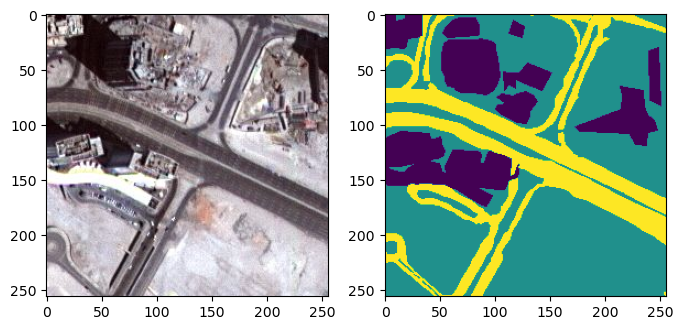

In [67]:
image_number = random.randint(0, len(image_dataset))

plt.figure(figsize = (8,5))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [27]:
n_classes = len(np.unique(labels)) 

from keras.utils import to_categorical
labels_cate = to_categorical(labels, num_classes= n_classes)

In [28]:
labels_cate.shape

(1305, 256, 256, 6)

In [69]:
labels_cate[99][0][0]

array([0., 0., 0., 0., 1., 0.], dtype=float32)

In [30]:
BACKBONE = "resnet34"
preprocess_input = sm.get_preprocessing(BACKBONE)

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_dataset, labels_cate, test_size = 0.2, random_state= 0)

In [32]:
x_train[0]

array([[[0.80784314, 0.76470588, 0.74901961],
        [0.75686275, 0.7254902 , 0.69803922],
        [0.78431373, 0.74901961, 0.73333333],
        ...,
        [0.54901961, 0.54117647, 0.56470588],
        [0.71764706, 0.70196078, 0.7254902 ],
        [0.58039216, 0.55294118, 0.58039216]],

       [[0.79215686, 0.74901961, 0.73333333],
        [0.75686275, 0.72156863, 0.70588235],
        [0.74901961, 0.71372549, 0.69803922],
        ...,
        [0.4745098 , 0.46666667, 0.49019608],
        [0.55294118, 0.53333333, 0.56862745],
        [0.27058824, 0.23921569, 0.27843137]],

       [[0.82352941, 0.78039216, 0.76470588],
        [0.81176471, 0.77647059, 0.76078431],
        [0.76078431, 0.7254902 , 0.70980392],
        ...,
        [0.58823529, 0.57254902, 0.59607843],
        [0.60784314, 0.58823529, 0.62352941],
        [0.34901961, 0.31764706, 0.35686275]],

       ...,

       [[0.4745098 , 0.49411765, 0.48627451],
        [0.45098039, 0.4745098 , 0.47058824],
        [0.39607843, 0

In [33]:
x_train_prepro = preprocess_input(x_train)
x_test_prepro = preprocess_input(x_test)

In [34]:
x_train_prepro[0]

array([[[0.80784314, 0.76470588, 0.74901961],
        [0.75686275, 0.7254902 , 0.69803922],
        [0.78431373, 0.74901961, 0.73333333],
        ...,
        [0.54901961, 0.54117647, 0.56470588],
        [0.71764706, 0.70196078, 0.7254902 ],
        [0.58039216, 0.55294118, 0.58039216]],

       [[0.79215686, 0.74901961, 0.73333333],
        [0.75686275, 0.72156863, 0.70588235],
        [0.74901961, 0.71372549, 0.69803922],
        ...,
        [0.4745098 , 0.46666667, 0.49019608],
        [0.55294118, 0.53333333, 0.56862745],
        [0.27058824, 0.23921569, 0.27843137]],

       [[0.82352941, 0.78039216, 0.76470588],
        [0.81176471, 0.77647059, 0.76078431],
        [0.76078431, 0.7254902 , 0.70980392],
        ...,
        [0.58823529, 0.57254902, 0.59607843],
        [0.60784314, 0.58823529, 0.62352941],
        [0.34901961, 0.31764706, 0.35686275]],

       ...,

       [[0.4745098 , 0.49411765, 0.48627451],
        [0.45098039, 0.4745098 , 0.47058824],
        [0.39607843, 0

In [35]:
base_model = sm.Unet(BACKBONE, encoder_weights= "imagenet")

In [36]:
from keras.layers import Input, Conv2D, Dropout, MaxPooling2D, BatchNormalization, UpSampling2D,\
Concatenate, concatenate, Conv2DTranspose
from keras.models import Model

In [37]:
def unet_model(input_shape, num_classes):
    inputs = Input(input_shape)

    # Downsampling path
    conv1 = Conv2D(3, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(3, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(10, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(10, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(32, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(32, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(64, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(64, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(128, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(128, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Upsampling path
    up6 = Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(drop5)
    up6 = concatenate([up6, drop4])
    conv6 = Conv2D(64, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(64, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3])
    conv7 = Conv2D(32, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(32, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(10, 2, strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2])
    conv8 = Conv2D(10, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(10, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(32, 2, strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1])
    conv9 = Conv2D(3, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(3, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(num_classes, 1, activation='softmax')(conv9)  # Output layer with num_classes channels for multi-class segmentation

    model = Model(inputs=inputs, outputs=outputs)

    return model

In [38]:
input_shape= x_train_prepro.shape[1:]

input_shape

(256, 256, 3)

In [39]:
model = unet_model(input_shape, n_classes)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics= [sm.metrics.iou_score])


# optimizer = Adam(learning_rate= 0.001)
# model.compile(optimizer= optimizer, loss= sm.losses.bce_jaccard_loss, metrics= [sm.metrics.iou_score])

In [40]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 3)  84          ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 3)  84          ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 128, 128, 3)  0           ['conv2d_1[0][0]']         

In [41]:
history = model.fit(x_train_prepro, y_train, batch_size= 50, epochs= 10, verbose=1,
                    validation_data= (x_test_prepro, y_test))

Epoch 1/10
21/21 [==============================] - 119s 5s/step - loss: 1.6752 - iou_score: 0.0800 - val_loss: 1.5675 - val_iou_score: 0.0956
Epoch 2/10
21/21 [==============================] - 110s 5s/step - loss: 1.4346 - iou_score: 0.1069 - val_loss: 1.3606 - val_iou_score: 0.1272
Epoch 3/10
21/21 [==============================] - 116s 6s/step - loss: 1.2261 - iou_score: 0.1492 - val_loss: 1.1975 - val_iou_score: 0.1515
Epoch 4/10
21/21 [==============================] - 112s 5s/step - loss: 1.1467 - iou_score: 0.1645 - val_loss: 1.1677 - val_iou_score: 0.1611
Epoch 5/10
21/21 [==============================] - 113s 5s/step - loss: 1.1324 - iou_score: 0.1659 - val_loss: 1.1761 - val_iou_score: 0.1547
Epoch 6/10
21/21 [==============================] - 123s 6s/step - loss: 1.1207 - iou_score: 0.1662 - val_loss: 1.1444 - val_iou_score: 0.1644
Epoch 7/10
21/21 [==============================] - 127s 6s/step - loss: 1.1140 - iou_score: 0.1676 - val_loss: 1.1358 - val_iou_score: 0.1676

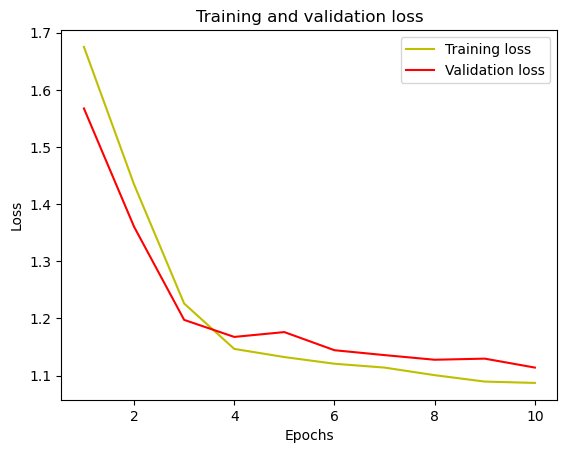

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

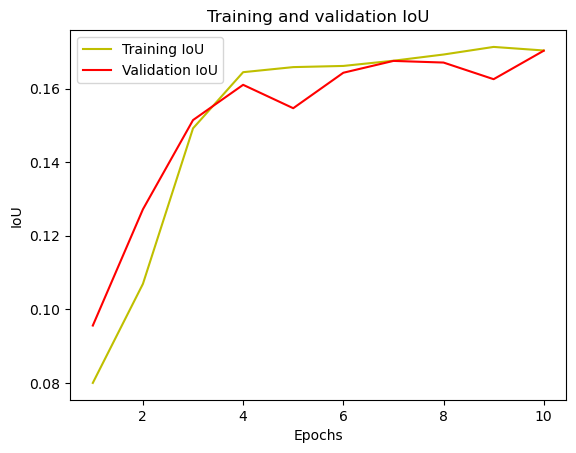

In [43]:
acc = history.history['iou_score']
val_acc = history.history['val_iou_score']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [44]:
y_pred=model.predict(x_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)


#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

9/9 [==============================] - 5s 484ms/step
Mean IoU = 0.13176574


1/1 [==============================] - 0s 63ms/step


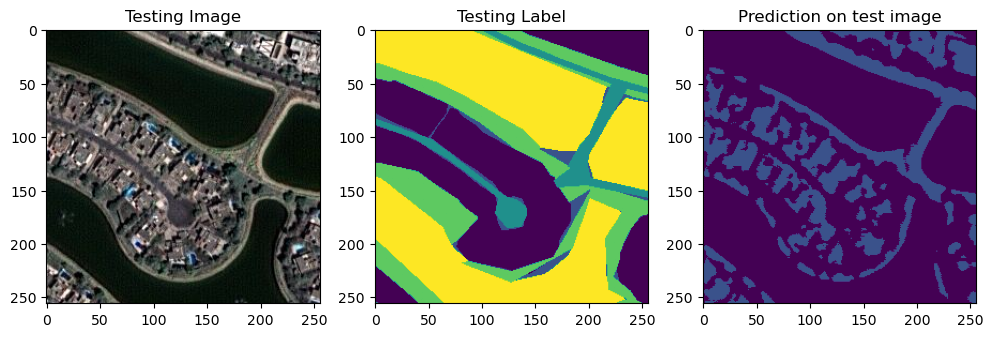

In [45]:
#Predict on a few images

import random
test_img_number = random.randint(0, len(x_test))

test_img = x_test[test_img_number]

ground_truth=y_test_argmax[test_img_number]

test_img_input=np.expand_dims(test_img, 0)

prediction = (model.predict(test_img_input))

predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

In [46]:
model.save('first_model.h5')

In [47]:
from tensorflow.keras.models import load_model

import segmentation_models as sm

In [48]:
sv_model = load_model('first_model.h5', custom_objects={'iou_score': sm.metrics.iou_score})

In [49]:
sv_model

1/1 [==============================] - 0s 187ms/step


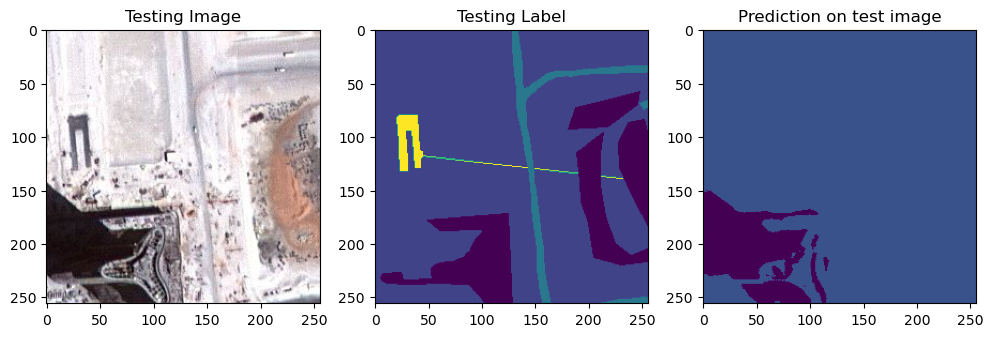

In [50]:
test_img2 = x_test[10]

ground_truth2 = y_test_argmax[10]

test_img_input2 = np.expand_dims(test_img2, 0)

prediction2 = (sv_model.predict(test_img_input2))

predicted_img2 = np.argmax(prediction2, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img2)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth2)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img2)
plt.show()

In [51]:
from PIL import Image
import numpy as np

In [52]:
ran_image_ori = Image.open('dubai1.jpg')

ran_image = ran_image_ori.resize((256, 256))
ran_image = np.array(ran_image) / 255.0


In [53]:
# from PIL import Image
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Load the image
# ran_image = Image.open('path/to/ran_image.jpg')

# # Resize and convert the image to a numpy array
# resized_image = ran_image.resize((256, 256))
# input_image = np.array(resized_image)

# # Rescale the image using the same scaler used during training
# scaler = MinMaxScaler(feature_range=(0, 1))  # Create the scaler object
# input_image = scaler.transform(input_image)  # Apply the scaler

# # Reshape the image and add an extra dimension for batch size
# input_image = input_image.reshape(1, 256, 256, 3)

# # Make prediction
# predictions = model.predict(input_image)


In [54]:
ran_image.shape

(256, 256, 3)

In [55]:
ran_image = np.expand_dims(ran_image, axis=0)

In [56]:
ran_predictions = sv_model.predict(ran_image)

1/1 [==============================] - 0s 51ms/step


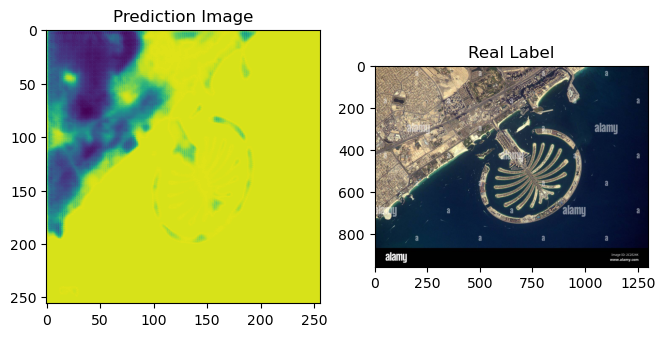

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Prediction Image')
plt.imshow(ran_predictions[0, :, :, 5])
plt.subplot(232)
plt.title('Real Label')
plt.imshow(ran_image_ori)
plt.show()

In [ ]:
## convert this 6 dimension prediction image to 3 dimension...... You can see the better result